
# <h1 style="color:blue">Logistic Regression on Titanic</h1>
    
 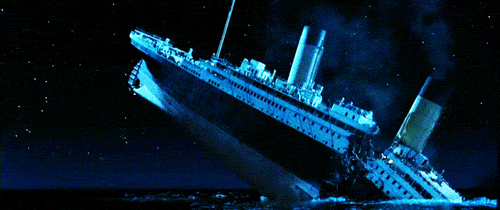

This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

### <font color='blue'> Import Libraries</font>
Let's import some libraries to get started!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

<font color='blue'>Let's start by reading in the titanic_train.csv file into a pandas dataframe.</font>

In [ ]:
train = pd.read_csv('../input/titanic/train.csv')

In [ ]:
#first Five Rows
train.head()

In [ ]:
train.shape

In [ ]:
train.columns

In [ ]:
train.select_dtypes(include=object).columns

In [ ]:
train.select_dtypes(exclude=object).columns

# Exploratory Data Analysis

<font color='blue'>Let's begin some exploratory data analysis! We'll start by checking out missing data!</font>

## Missing Data

<font color='blue'>We can use seaborn to create a simple heatmap to see where we are missing data!</font>

In [ ]:
train.isnull().sum()

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<font color='blue'><font>Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

In [ ]:
sns.set_style('whitegrid')
ax=sns.countplot(x="Survived",data=train)
counts=train['Survived'].value_counts()
for i,count in enumerate(counts):
    ax.text(i,count+10,count,ha='center',fontsize=14)
    
plt.show()
print(f"There are {counts[0]} are deceased and {counts[1]} people are survived ")

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
ax = sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')
plt.show()
counts=train.groupby("Pclass")['Survived'].value_counts()
pd.DataFrame(counts).style.background_gradient()




- We can notice that the survival rate is high in First class,and survival rate is ver less in Third class
- 491 passengers travelled in Third class and only 24% people survived from them

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.countplot(x='Pclass',hue='Survived',data=train)
plt.subplot(122)
sns.countplot(x=train[train['Age']<18]['Age'].astype('int32'),hue=train[train['Age']<18]['Survived'],data=train)
plt.show()

In [ ]:
sns.distplot(train['Age'].dropna(),kde=True,color='darkred',bins=40)

In [ ]:
train['Age'].skew()
train['Age'].value_counts()

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(train['Age'])

In [ ]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.countplot(x='SibSp',data=train)
plt.xlabel('No of sibilings/Spouse')
plt.subplot(122)
sns.countplot(x='SibSp',hue='Survived',data=train)
plt.xlabel('No of sibilings/Spouse')
plt.show()

pd.DataFrame(train.groupby('Survived')['SibSp'].value_counts()).style.background_gradient()



- 67% (608)people travelling alone among 891 passengers,only 33%(210) passengers are survived  who travelled alone
- 112 survived and 97 not survived who travelled with one sibiling


In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.countplot(x='Parch',data=train)
plt.xlabel('No of Parch')
plt.subplot(122)
sns.countplot(x='Parch',hue='Survived',data=train)
plt.xlabel('No of Parch')
plt.show()

pd.DataFrame(train.groupby('Survived')['Parch'].value_counts()).style.background_gradient()



In [ ]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [ ]:
train.groupby('Pclass')['Fare'].value_counts()

In [ ]:
sns.countplot(x=train['Pclass'].dropna(),hue='Survived',data=train)

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

___
## Data Cleaning
<font color='blue'><font>We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

<font color='blue'><font>We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [ ]:
# median_age=train.groupby(['Pclass'])['Age'].transform('median')
# train['Age'] = train['Age'].fillna(median_age)
# train['Age'].isnull().sum()


In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
    
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)


Now let's check that heat map again!

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<font color='blue'><font>Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.head()

In [ ]:
train.isnull().sum()

In [ ]:
train[(train['Embarked']).isnull()]

- In the Embarked column There is 2 null values
- We can drop 2 rows in Embarked columns because there is no possible way to replace the value

In [ ]:
train.dropna(inplace=True)

In [ ]:
train.shape

- After dropping 2 rows from embarked column and dropped cabin column from the train dataset results 889 rows and 11 columns in train dataset 

## Converting Categorical Features 
<font color='blue'><font>
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
train.info()

In [ ]:
train.select_dtypes(include=object).columns

In [ ]:
import pandas as pd

# Using get_dummies method
sex = pd.get_dummies(train['Sex'], prefix='Sex', drop_first=True)
embarked = pd.get_dummies(train['Embarked'], prefix='Embarked', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
train = pd.concat([train, sex, embarked], axis=1)

# Drop the original 'Sex' and 'Embarked' columns
train.drop(['Sex', 'Embarked'], axis=1, inplace=True)

train.head()


In [ ]:
# from sklearn.preprocessing import OrdinalEncoder
# encoder = OrdinalEncoder()

# # Replace the original columns with the encoded values
# train[['Sex', 'Embarked']] = encoder.fit_transform(train[['Sex', 'Embarked']])
# train.head()



In [ ]:
train.drop(['Name','Ticket'],axis=1,inplace=True)

In [ ]:
train.head()

Great! Our data is ready for our model!

# Building a Logistic Regression model
<font color='blue'>
Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).</font>

## Train Test Split

In [ ]:
train.head()

In [ ]:
from sklearn.model_selection import train_test_split
X=train.drop('Survived',axis=1)
y=train['Survived']

In [ ]:
X.head()

In [ ]:
y.head()

## Training and Predicting

In [ ]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, 
                                                    random_state=2)

lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)
predictions = lr.predict(X_test)
lr.score(X_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
accuracy=confusion_matrix(y_test,predictions)

In [ ]:
pd.DataFrame(accuracy).style.background_gradient()

TN=150
TP=72
FN=25
FP=20


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy=accuracy_score(y_test,predictions)
accuracy

Let's move on to evaluate our model!

## Evaluation

<font color='blue'>We can check precision,recall,f1-score using classification report!

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

This is the classification report generated by evaluating the performance of a classification model on the test set. Here's how to interpret each part:

- **Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. In simple terms, it measures the accuracy of positive predictions. For class 0, the precision is 0.86, which means that among all instances predicted as class 0, 86% of them are actually class 0. For class 1, the precision is 0.78, indicating that 78% of instances predicted as class 1 are actually class 1.

- **Recall**: Recall, also known as sensitivity or true positive rate, is the ratio of correctly predicted positive observations to the all actual positives. It measures the ability of the model to correctly identify positive instances. For class 0, the recall is 0.88, meaning that the model correctly identifies 88% of all actual class 0 instances. For class 1, the recall is 0.74, indicating that the model correctly identifies 74% of all actual class 1 instances.

- **F1-score**: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, considering both false positives and false negatives. It ranges from 0 to 1, where higher values indicate better performance. For class 0, the F1-score is 0.87, and for class 1, it is 0.76.

- **Support**: Support is the number of actual occurrences of each class in the test set. For class 0, there are 170 instances, and for class 1, there are 97 instances.

- **Accuracy**: Accuracy is the ratio of correctly predicted instances to the total instances in the test set. It represents the overall correctness of the model across all classes. In this case, the accuracy is 0.83, indicating that the model correctly predicts the class for 83% of the instances in the test set.

- **Macro Avg**: Macro average calculates the metrics for each class independently and then takes the unweighted mean of the scores. It gives equal weight to each class, regardless of class imbalance.

- **Weighted Avg**: Weighted average calculates the metrics for each class independently and then takes the weighted average of the scores, where the weight corresponds to the support of each class. It considers class imbalance and gives higher weight to classes with more instances.


Precision = (True Positives) / (True Positives + False Positives)

Recall = (True Positives) / (True Positives + False Negatives)

F1-score = 2 * ((Precision * Recall) / (Precision + Recall))

Accuracy = (Correct Predictions) / (Total Predictions)

Macro Avg Precision = (Precision_class1 + Precision_class2 + ... + Precision_classN) / N

Macro Avg Recall = (Recall_class1 + Recall_class2 + ... + Recall_classN) / N

Macro Avg F1-score = (F1-score_class1 + F1-score_class2 + ... + F1-score_classN) / N

Weighted Avg Precision = (Precision_class1 * Support_class1 + Precision_class2 * Support_class2 + ... + Precision_classN * Support_classN) / Total Support

Weighted Avg Recall = (Recall_class1 * Support_class1 + Recall_class2 * Support_class2 + ... + Recall_classN * Support_classN) / Total Support

Weighted Avg F1-score = (F1-score_class1 * Support_class1 + F1-score_class2 * Support_class2 + ... + F1-score_classN * Support_classN) / Total Support


Precision: Precision measures the accuracy of the positive predictions. It is calculated as the ratio of true positives to the sum of true positives and false positives.

For class 0 (not survived):
Precision = TP / (TP + FP) = 150 / (150 + 25) = 0.8571 (approximately)
For class 1 (survived):
Precision = TP / (TP + FP) = 72 / (72 + 20) = 0.7826 (approximately)
Recall: Recall measures the ratio of correctly predicted positive observations to the all observations in actual class.

For class 0 (not survived):
Recall = TP / (TP + FN) = 150 / (150 + 20) = 0.8824 (approximately)
For class 1 (survived):
Recall = TP / (TP + FN) = 72 / (72 + 25) = 0.7423 (approximately)
F1-score: F1-score is the harmonic mean of precision and recall. It is calculated as 2 * ((Precision * Recall) / (Precision + Recall)).

For class 0 (not survived):
F1-score = 2 * ((Precision * Recall) / (Precision + Recall))
= 2 * ((0.8571 * 0.8824) / (0.8571 + 0.8824)) ≈ 0.8697
For class 1 (survived):
F1-score = 2 * ((Precision * Recall) / (Precision + Recall))
= 2 * ((0.7826 * 0.7423) / (0.7826 + 0.7423)) ≈ 0.7621
Accuracy: Accuracy measures the proportion of correctly classified instances among all instances.

Accuracy = (TP + TN) / (TP + TN + FP + FN)
= (150 + 72) / (150 + 20 + 25 + 72) ≈ 0.8315

Macro Average: Macro average calculates the average of the metric for each class, without considering class imbalance.

Macro Average Precision = (Precision class 0 + Precision class 1) / 2
≈ (0.8571 + 0.7826) / 2 ≈ 0.8199
Macro Average Recall = (Recall class 0 + Recall class 1) / 2
≈ (0.8824 + 0.7423) / 2 ≈ 0.8124
Macro Average F1-score = (F1-score class 0 + F1-score class 1) / 2
≈ (0.8697 + 0.7621) / 2 ≈ 0.8159
Weighted Average: Weighted average calculates the average of the metric for each class, considering class imbalance by weighting with the support (number of samples) for each class.

Weighted Average Precision = (Precision class 0 * Support class 0 + Precision class 1 * Support class 1) / Total Support
≈ (0.8571 * 170 + 0.7826 * 97) / (170 + 97) ≈ 0.8286
Weighted Average Recall = (Recall class 0 * Support class 0 + Recall class 1 * Support class 1) / Total Support
≈ (0.8824 * 170 + 0.7423 * 97) / (170 + 97) ≈ 0.8315
Weighted Average F1-score = (F1-score class 0 * Support class 0 + F1-score class 1 * Support class 1) / Total Support
≈ (0.8697 * 170 + 0.7621 * 97) / (170 + 97) ≈ 0.8295